In [ ]:
import matplotlib.pyplot as plt
import method as md
import matplotlib

In [ ]:
md.ShowChannelList()

In [ ]:
username = "MohammadZarchi"
data = md.fe(username)

In [ ]:
data = await md.get_data(username, 2000)

In [ ]:
datetime_srt = md.ts("2010-01-18 00:00") # Start
datetime_end = md.ts("2025-12-25 23:59") # End

In [ ]:
dics = md.get_vfm_data(data, 0, name="as")
plt.plot(dics['cont'], dics['view'], label='View', linewidth=2)
plt.title(f'\nChannel posts View chart of @{username}\n', fontname="DejaVu Sans", size=32)
plt.xlabel("\nNumber(id) of posts")
plt.ylabel("Count of View")
plt.legend()
plt.grid(color='gray', linestyle='--', axis='both', linewidth=0.8)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [ ]:
lv_data = dict(sorted(dics['view_dict'].items(), key=lambda item: item[1], reverse=True))
for idx,key in enumerate(lv_data):
    print('{}: ({:,} views)\nhttps://t.me/{}/{}\n'.format(idx+1, lv_data[key], username, key))
    if idx > 3:
        break

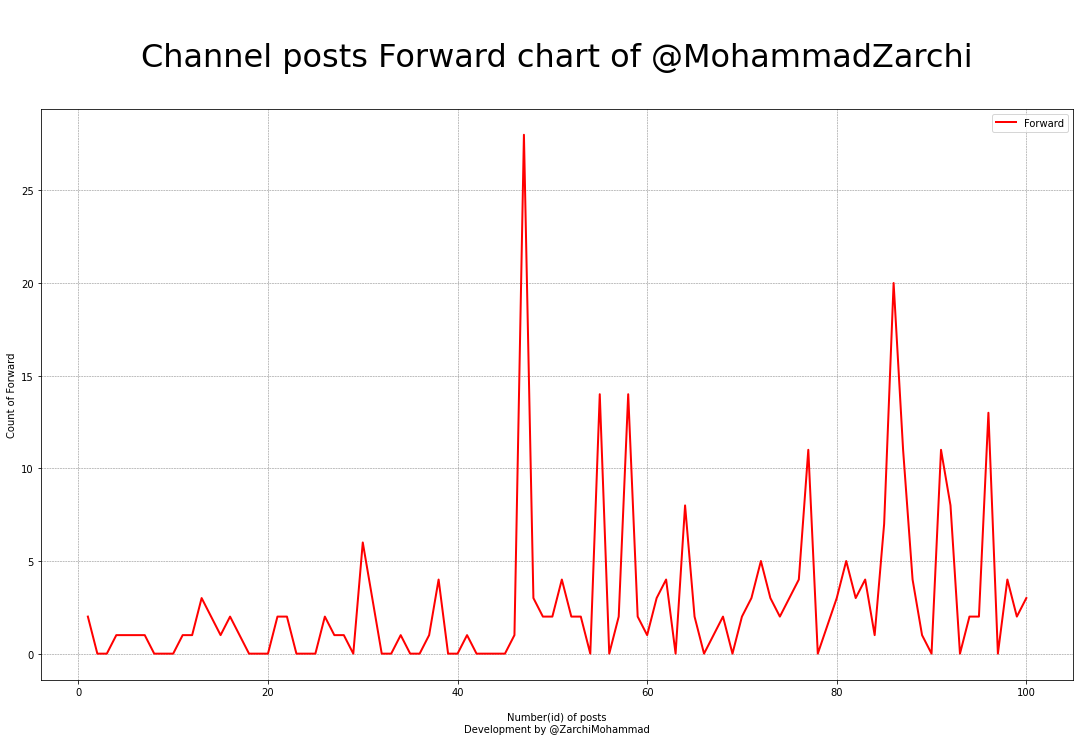

In [7]:
plt.plot(dics['cont'], dics['forw'], 'r', label='Forward',linewidth=2)
plt.title(f'\nChannel posts Forward chart of @{username}\n', fontname="DejaVu Sans", size=32)
plt.xlabel("\nNumber(id) of posts\nDevelopment by @ZarchiMohammad")
plt.ylabel("Count of Forward")
plt.legend();
plt.grid(color='gray', linestyle='--', axis='both', linewidth=0.5)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [ ]:
x1, y1, tod, distance = md.scatter_handel(data)
plt.figure(figsize=(15, 15))
plt.scatter(x1['g1'], y1['g1'], color='#000000', s=100, marker=".")
plt.scatter(x1['g2'], y1['g2'], color='#202020', s=100, marker=".")
plt.scatter(x1['g3'], y1['g3'], color='#404040', s=100, marker=".")
plt.scatter(tod[0], tod[1], color='#FF0000', s=100, marker=".")

plt.title(f'\nScatter points of @{username} Telegram channel\n',
          fontname="DejaVu Sans", size=14)
plt.xlabel("\nNumber of year\n")
plt.ylabel("\nName of month\n")
plt.grid(color='gray', linestyle='--', linewidth=0.7)
x = ['', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
y = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xlim([0, 12])
plt.ylim([0, 12])

plt.xticks(range(len(x)), x)
plt.yticks(range(len(y)), y)
plt.tick_params(axis="y", which="both", labelleft=True, labelright=True)


In [ ]:
md.show_day_distance(distance, 5)